In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
import os
print("current dir", os.getcwd())
curr_dirr = os.getcwd()
train_path = os.path.join(curr_dirr, "dataset", "Train")
test_path = os.path.join(curr_dirr, "dataset", "Test")
valid_path = os.path.join(curr_dirr, "dataset", "Valid")

current dir c:\Users\saipi\Downloads\POTATO_DISEASE_PREDICTION


In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [5]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [7]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same",activation='relu',input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same",activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same",activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding="same",activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\saipi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [9]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 804ms/step - accuracy: 0.3524 - loss: 1.5635 - val_accuracy: 0.5967 - val_loss: 0.8807
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 784ms/step - accuracy: 0.5691 - loss: 0.8359 - val_accuracy: 0.6000 - val_loss: 0.9004
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 792ms/step - accuracy: 0.5711 - loss: 0.8692 - val_accuracy: 0.6733 - val_loss: 0.6081
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 807ms/step - accuracy: 0.8068 - loss: 0.5096 - val_accuracy: 0.7700 - val_loss: 0.5314
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 832ms/step - accuracy: 0.8571 - loss: 0.3531 - val_accuracy: 0.8533 - val_loss: 0.3787
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 842ms/step - accuracy: 0.8974 - loss: 0.2922 - val_accuracy: 0.9233 - val_loss: 0.1847
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 832ms/step - accuracy: 0.9404 - loss: 0.1588 - val_accuracy: 0.8067 - val_loss: 0.5196
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 824ms/step - accuracy: 0.8795 - loss: 0.2816 - val_accu

In [11]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - accuracy: 0.9671 - loss: 0.0827
Training accuracy: 0.9688888788223267


In [12]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 0.9286 - loss: 0.1816
Validation accuracy: 0.9233333468437195


In [13]:
cnn.save('trained_plant_disease_model.keras')

In [14]:
training_history.history

{'accuracy': [0.41777777671813965,
  0.5844444632530212,
  0.6277777552604675,
  0.8277778029441833,
  0.8888888955116272,
  0.9211111068725586,
  0.9322222471237183,
  0.9277777671813965,
  0.9133333563804626,
  0.9577777981758118],
 'loss': [1.2295221090316772,
  0.8043424487113953,
  0.7698705792427063,
  0.4369885325431824,
  0.29572007060050964,
  0.24112200736999512,
  0.19270069897174835,
  0.19850996136665344,
  0.25383785367012024,
  0.11159122735261917],
 'val_accuracy': [0.596666693687439,
  0.6000000238418579,
  0.6733333468437195,
  0.7699999809265137,
  0.8533333539962769,
  0.9233333468437195,
  0.8066666722297668,
  0.9366666674613953,
  0.9166666865348816,
  0.9233333468437195],
 'val_loss': [0.8806619048118591,
  0.9004143476486206,
  0.6081109046936035,
  0.5313607454299927,
  0.3786785304546356,
  0.18467004597187042,
  0.5195928812026978,
  0.16688475012779236,
  0.2118973731994629,
  0.20112091302871704]}

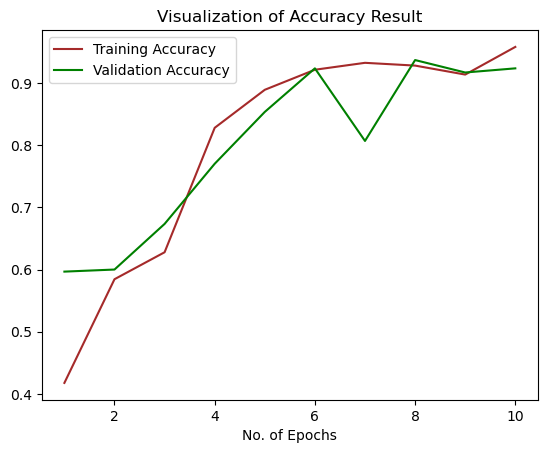

In [15]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()